Part 1: Regression Task (California Housing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task 1: Load and Split Dataset
• Use the California Housing dataset from sklearn.datasets.
• Split the dataset into **training (80%)** and **test (20%)** sets.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/kaggle/californiahousing/fetch_california_housing.csv")
print (df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [ ]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(16512, 8) (4128, 8)


Task 2: Complete all the Task
• Regression Task (California Housing):

– Step 1: Baseline Model (No Regularization) Build a Linear Regression model without
any regularization.
∗ Train the model on the training set.
∗ Observe the coefficients of the model.
∗ Compute the Mean Squared Error (MSE) on both training and test sets.
∗ This step helps to understand how a simple linear model behaves on the dataset and serves as
a baseline for comparison.

In [ ]:
# Train baseline linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# MSE
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)

print("Baseline Linear Regression")
print("Training MSE:", mse_train_lr)
print("Test MSE:", mse_test_lr)

# Coefficients
coefficients_lr = pd.Series(lr.coef_, index=X.columns)
print("\nLinear Regression Coefficients:")
print(coefficients_lr)


Baseline Linear Regression
Training MSE: 0.5179331255246699
Test MSE: 0.555891598695244

Linear Regression Coefficients:
MedInc        0.854383
HouseAge      0.122546
AveRooms     -0.294410
AveBedrms     0.339259
Population   -0.002308
AveOccup     -0.040829
Latitude     -0.896929
Longitude    -0.869842
dtype: float64


Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for Ridge and Lasso regression models.
∗ Define a grid of alpha values (regularization strength).
∗ Run cross-validation on the training set to find the optimal alpha.
∗ Evaluate the model performance on the test set using MSE.
∗ This step demonstrates the importance of selecting appropriate hyperparameters to improve
generalization.

In [ ]:
alpha_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:
ridge = Ridge()
ridge_cv = GridSearchCV(
    ridge, alpha_grid, cv=5, n_jobs=-1, verbose = 1,  scoring="neg_mean_squared_error"
)
ridge_cv.fit(X_train_scaled, y_train)

best_ridge = ridge_cv.best_estimator_

y_test_pred_ridge = best_ridge.predict(X_test_scaled)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

print("Best Ridge alpha:", ridge_cv.best_params_["alpha"])
print("Ridge Test MSE:", mse_test_ridge)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Ridge alpha: 10
Ridge Test MSE: 0.17068479034471545


In [ ]:
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(
    lasso, alpha_grid, cv=5, scoring="neg_mean_squared_error"
)
lasso_cv.fit(X_train_scaled, y_train)

best_lasso = lasso_cv.best_estimator_

y_test_pred_lasso = best_lasso.predict(X_test_scaled)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print("Best Lasso alpha:", lasso_cv.best_params_["alpha"])
print("Lasso Test MSE:", mse_test_lasso)


Best Lasso alpha: 0.001
Lasso Test MSE: 0.5544913600832686


– Step 3: Regularization Experiments (L1 vs L2) Train L1 (Lasso) and L2 (Ridge) regres-
sion models using the optimal hyperparameters.

∗ Compare the coefficients learned by both models. Notice that L1 tends to produce sparse
coefficients (some set to zero), while L2 shrinks coefficients without zeroing them.
∗ Evaluate and compare the MSE on training and test sets.
∗ Discuss the effect of regularization on the bias-variance tradeoff:
· How L1/L2 reduces variance and prevents overfitting.
· How excessive regularization may increase bias and underfit the data.
∗ Visualize the effect by plotting coefficients or training/test error versus alpha values (optional
but recommended).

In [ ]:
coef_comparison = pd.DataFrame({
    "Linear": lr.coef_,
    "Ridge": best_ridge.coef_,
    "Lasso": best_lasso.coef_
}, index=X.columns)

print(coef_comparison)


              Linear     Ridge     Lasso
MedInc      0.854383  0.854377  0.849140
HouseAge    0.122546  0.122554  0.123346
AveRooms   -0.294410 -0.294390 -0.281273
AveBedrms   0.339259  0.339234  0.326050
Population -0.002308 -0.002305 -0.001062
AveOccup   -0.040829 -0.040829 -0.039890
Latitude   -0.896929 -0.896853 -0.885822
Longitude  -0.869842 -0.869765 -0.858093


In [ ]:
print("\nMSE Comparison")
print("Linear Regression Test MSE:", mse_test_lr)
print("Ridge Regression Test MSE:", mse_test_ridge)
print("Lasso Regression Test MSE:", mse_test_lasso)



MSE Comparison
Linear Regression Test MSE: 0.555891598695244
Ridge Regression Test MSE: 0.5558879138674182
Lasso Regression Test MSE: 0.5544913600832686


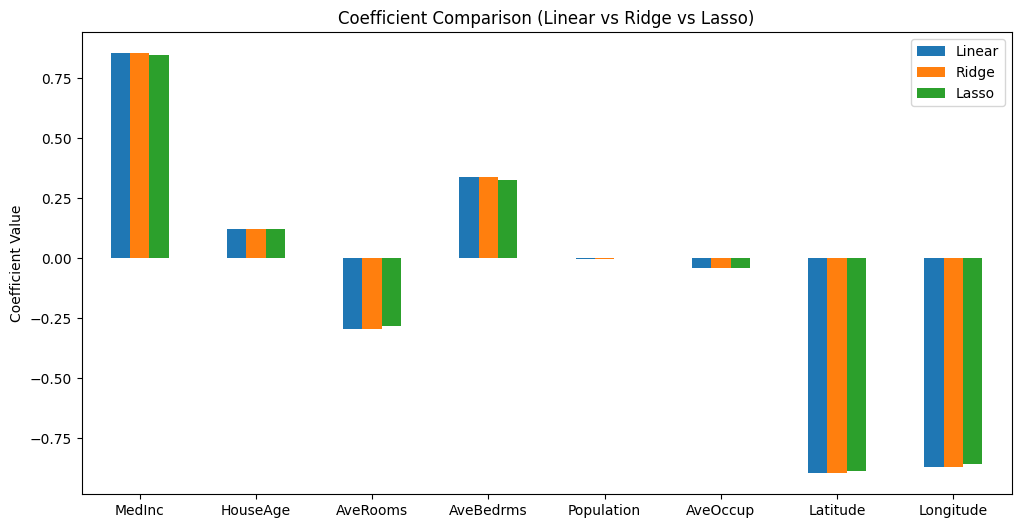

In [ ]:
coef_comparison.plot(kind="bar", figsize=(12,6))
plt.title("Coefficient Comparison (Linear vs Ridge vs Lasso)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=360)
plt.show()

Part 2: Classification Task (Breast Cancer)

Task 1: Load and Split Dataset
• Use the Breast Cancer dataset from sklearn.datasets.
• Treat it as a binary classification task.
• Split into training (80%) and test (20%) sets.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/kaggle/breastcancer/Breast_Cancer.csv")
print (df.columns)


Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Status", axis=1)
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


4.2 Task 2: Complete all the Task
• Classification Task (Diabetes):

– Step 1: Baseline Model (No Regularization) Build a Logistic Regression model without
specifying any regularization (default settings).
∗ Train the model on the training set.
∗ Observe the coefficients of the model.
∗ Compute the accuracy on both training and test sets.
∗ This step serves as a baseline for comparison and helps to understand the behavior of a standard
logistic regression model on the dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/diabetes_.csv")

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split dataset into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Logistic Regression
baseline_lr = LogisticRegression(max_iter=10000)  # ensures convergence
baseline_lr.fit(X_train_scaled, y_train)

# Coefficients
coefficients = pd.Series(baseline_lr.coef_[0], index=X.columns)
print("Baseline Logistic Regression Coefficients:")
print(coefficients)

# Accuracy
train_accuracy = accuracy_score(y_train, baseline_lr.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, baseline_lr.predict(X_test_scaled))

print("\nBaseline Logistic Regression Accuracy:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")


Baseline Logistic Regression Coefficients:
Pregnancies                 0.212554
Glucose                     1.071301
BloodPressure              -0.247826
SkinThickness               0.045729
Insulin                    -0.200783
BMI                         0.778182
DiabetesPedigreeFunction    0.230625
Age                         0.421207
dtype: float64

Baseline Logistic Regression Accuracy:
Training Accuracy: 0.770
Test Accuracy: 0.753


– Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for logistic regression models with regularization.
∗ Focus on tuning the C parameter (inverse of regularization strength) and the penalty type
(l1 or l2).
∗ Run cross-validation on the training set to identify the optimal hyperparameters.
∗ Evaluate the model performance on the test set using accuracy.

∗ This step demonstrates the importance of hyperparameter selection for improving model gen-
eralization.

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=10000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

best_lr = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on test set
test_acc_best = accuracy_score(y_test, best_lr.predict(X_test_scaled))
print("Test Accuracy with best hyperparameters:", test_acc_best)


Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy with best hyperparameters: 0.7532467532467533


Step 3: Regularization Experiments (L1 vs L2) Train separate logistic regression models
using L1 (Lasso-like) and L2 (Ridge-like) regularization with the optimal hyperparameters.
∗ Compare the coefficients for L1 and L2. Observe that L1 tends to produce sparse coefficients
(some exactly zero), whereas L2 shrinks all coefficients but rarely sets them exactly to zero.
∗ Evaluate and compare accuracy on training and test sets.
∗ Discuss the effect of regularization on the bias-variance tradeoff:
· How L1/L2 reduces variance and mitigates overfitting.
· How overly strong regularization may increase bias, reducing accuracy.
∗ Optional: Visualize the coefficients or plot accuracy vs C values to better understand the
impact of L1 and L2 regularization.

In [ ]:
# Separate models for L1 and L2 using best C from grid search
C_best = grid_search.best_params_['C']

# L1 Logistic Regression
lr_l1 = LogisticRegression(penalty='l1', C=C_best, solver='liblinear', max_iter=10000)
lr_l1.fit(X_train_scaled, y_train)

# L2 Logistic Regression
lr_l2 = LogisticRegression(penalty='l2', C=C_best, solver='liblinear', max_iter=10000)
lr_l2.fit(X_train_scaled, y_train)

# Coefficients comparison
coef_comparison = pd.DataFrame({
    'L1': lr_l1.coef_[0],
    'L2': lr_l2.coef_[0]
}, index=X.columns)

print("Coefficient comparison (L1 vs L2):")
print(coef_comparison)

# Accuracy comparison
train_acc_l1 = accuracy_score(y_train, lr_l1.predict(X_train_scaled))
test_acc_l1 = accuracy_score(y_test, lr_l1.predict(X_test_scaled))

train_acc_l2 = accuracy_score(y_train, lr_l2.predict(X_train_scaled))
test_acc_l2 = accuracy_score(y_test, lr_l2.predict(X_test_scaled))

print("\nAccuracy Comparison:")
print(f"L1 - Train: {train_acc_l1:.3f}, Test: {test_acc_l1:.3f}")
print(f"L2 - Train: {train_acc_l2:.3f}, Test: {test_acc_l2:.3f}")


Coefficient comparison (L1 vs L2):
                                L1        L2
Pregnancies               0.212815  0.213506
Glucose                   1.088625  1.089381
BloodPressure            -0.254400 -0.255904
SkinThickness             0.046239  0.048242
Insulin                  -0.208188 -0.209893
BMI                       0.791322  0.791731
DiabetesPedigreeFunction  0.232516  0.233423
Age                       0.424801  0.425589

Accuracy Comparison:
L1 - Train: 0.770, Test: 0.753
L2 - Train: 0.770, Test: 0.753


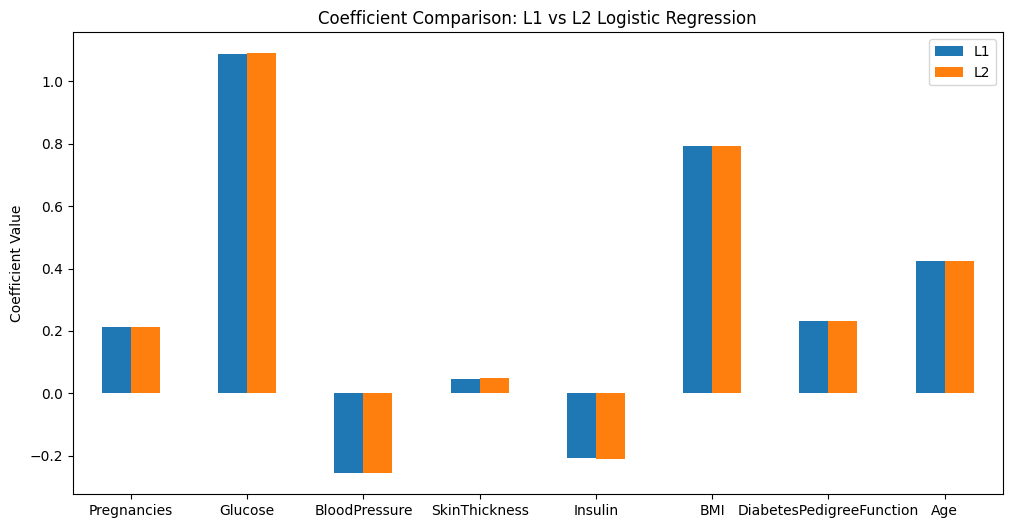

In [ ]:
coef_comparison.plot(kind='bar', figsize=(12,6))
plt.title("Coefficient Comparison: L1 vs L2 Logistic Regression")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=360)
plt.show()
